<a href="https://colab.research.google.com/github/fivetop/romee/blob/main/TF_2_x_Example_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist


#(x_train, t_train), (x_test, t_test) = mnist.load_data()
(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\n train shape = ', x_train.shape, ', train label shape = ', t_train.shape)
print(' test shape = ', x_test.shape, ', test label shape =', t_test.shape)

print('\n train label = ', t_train)  # 학습데이터 정답 출력
print(' test label  = ', t_test)     # 테스트 데이터 정답 출력

4422102/4422102 [==============================] - 0s 0us/step

 train shape =  (60000, 28, 28) , train label shape =  (60000,)
 test shape =  (10000, 28, 28) , test label shape = (10000,)

 train label =  [9 0 0 ... 3 0 5]
 test label  =  [9 2 1 ... 8 1 5]


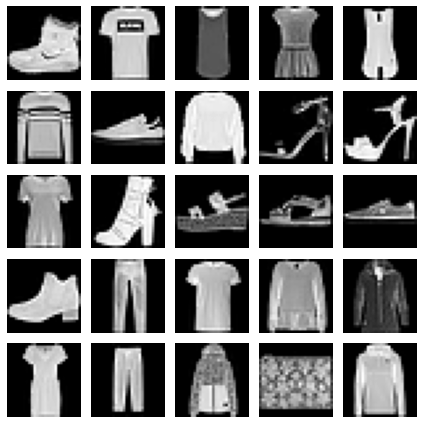

In [3]:
import matplotlib.pyplot as plt

# 25개의 이미지 출력
plt.figure(figsize=(6, 6)) 

for index in range(25):    # 25 개 이미지 출력

    plt.subplot(5, 5, index + 1)  # 5행 5열 
    plt.imshow(x_train[index], cmap='gray') 
    plt.axis('off')  

plt.tight_layout()
plt.show()

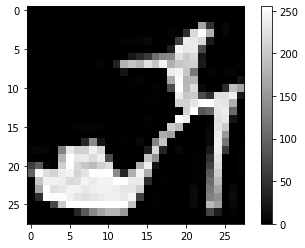

In [4]:
plt.imshow(x_train[9], cmap='gray') 
plt.colorbar()   
plt.show()

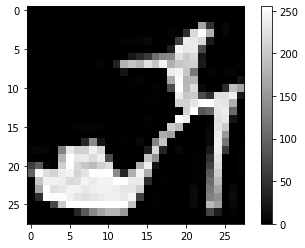

In [5]:
plt.imshow(x_train[9].reshape(28,28), cmap='gray') 
plt.colorbar()   
plt.show()

In [6]:
# 학습 데이터 / 테스트 데이터 정규화 (Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)

x_test = (x_test - 0.0) / (255.0 - 0.0)

In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

file_path='./modelchpoint_test.h5'

checkpoint = ModelCheckpoint(file_path, moniter='val_loss', verbose=1,mode='auto')

stopping = EarlyStopping(monitor='val_loss', patience=5)

#hist = model.fit(x_train, t_train, epochs=30, validation_split=0.2)
hist = model.fit(x_train, t_train, epochs=50, validation_split=0.2, callbacks=[checkpoint, stopping])


Epoch 1/50
1498/1500 [============================>.] - ETA: 0s - loss: 0.1035 - accuracy: 0.9612
Epoch 1: saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1035 - accuracy: 0.9612 - val_loss: 0.5368 - val_accuracy: 0.8804
Epoch 2/50
1498/1500 [============================>.] - ETA: 0s - loss: 0.1001 - accuracy: 0.9620
Epoch 2: saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1001 - accuracy: 0.9620 - val_loss: 0.4853 - val_accuracy: 0.8859
Epoch 3/50
1482/1500 [============================>.] - ETA: 0s - loss: 0.0980 - accuracy: 0.9632
Epoch 3: saving model to ./modelchpoint_test.h5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0983 - accuracy: 0.9630 - val_loss: 0.5001 - val_accuracy: 0.8867
Epoch 4/50
1477/1500 [============================>.] - ETA: 0s - loss: 0.0954 - accuracy: 0.9643
Epoch 4: saving model to ./modelchpoint_test.h5
1500/1500 [======

In [29]:
model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4614 - accuracy: 0.8750


[0.46140244603157043, 0.875]

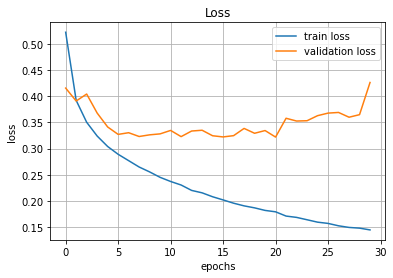

In [30]:
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

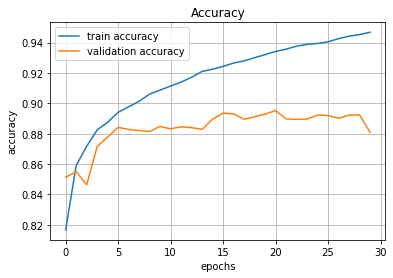

In [31]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()

In [32]:
pred = model.predict(x_test)

print(pred.shape)

print(pred[:5])  

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[[9.2155518e-14 4.2797853e-12 3.3295752e-11 1.2671205e-24 1.1977711e-14
  3.6534893e-06 1.0720625e-14 1.8143025e-03 6.8829448e-15 9.9818206e-01]
 [6.4405435e-06 6.9337372e-15 9.9884242e-01 5.4512605e-17 1.1451286e-03
  5.3844576e-12 6.0725865e-06 1.8667262e-13 4.9183051e-18 8.5424864e-21]
 [3.7392349e-17 1.0000000e+00 7.6057977e-24 5.8162199e-15 6.3899141e-23
  1.0630787e-29 3.4199215e-16 0.0000000e+00 1.3409908e-20 5.0620456e-34]
 [1.0432435e-13 1.0000000e+00 4.0154829e-19 8.3670443e-10 1.4132882e-18
  9.5192520e-20 4.0959944e-11 0.0000000e+00 1.4285432e-15 2.6200603e-27]
 [2.9722002e-01 1.3386617e-14 2.3663768e-03 9.1446303e-08 8.8472312e-05
  7.5155535e-09 7.0032501e-01 4.0042384e-16 2.8044067e-09 1.9030113e-09]]


# numpy.random.choice() 함수를 이용해서 x_test 에서 임의로 서로 다른 5개의 데이터를 추출해서 model.predict() 실행하시오

In [13]:
import numpy as np

random_index_list = np.random.choice(len(x_test), 5, False)

print(random_index_list)

[6158 4582 6134 7862 9012]


In [14]:
random_x_test_list = []

for index in random_index_list:

    random_x_test_list.append(x_test[index])

random_x_test_array = np.array(random_x_test_list)

print(random_x_test_array.shape)

(5, 28, 28)


In [15]:
random_pred = model.predict(random_x_test_array)

print(random_pred.shape)

print(np.argmax(random_pred, axis=1), t_test[random_index_list])

1/1 [==============================] - 0s 16ms/step
(5, 10)
[7 2 6 8 4] [7 2 6 8 4]


In [21]:
for i in range(5):
  print(np.argmax(pred[i]))
  #print(pred[i])

for i in range(5):
  print(t_test[i])

7
2
1
0
4
7
2
1
0
4
